# Getting data

In [1]:
import requests
import json


apikey = 'bcc855fd71b859791b2202d8297da1e3'
crawl_name = 'GEN'
url = "https://api.diffbot.com/v3/crawl/data"
urlData = {"token": apikey, "name": crawl_name, "format": json}
	# Go get the data
r = requests.get(url,urlData)
data = json.loads(r.text)
dict = {}
df = []
for rec in data:
    #dict[rec['text']] = rec['title']
    df.append(rec['title'])
print(len(df))

56878


saved data in excel

In [7]:
import pandas as pd
df = list(set(df))
save_df = pd.DataFrame(df)
path = "E:/intern/learn emojis from vector space models/data.csv"
save_df.to_excel(path)
writer = pd.ExcelWriter('data.xlsx', engine='xlsxwriter')
save_df.to_excel(writer, sheet_name='Sheet1')
writer.save()

importing data from excel and converting to strings

In [1]:
import pandas as pd

df = pd.read_excel("E:/intern/learn emojis from vector space models/data.xlsx")
df = df[0].astype(str)
df = set(df)
print(df)

{'~*💕*Independent Mature Woman* *Sweet *Sexy💗Natural Redhead*💕*~ 💟*DISCREET*💟 :-) - 51', '😍💋 Southern Belle DAZZLER 😘💋 New recent pictures 💋😍 Sweet and Discreet & REAL Nasty 😍💋😘 - 35', '★★★★★ 💋💕CUTE 💋 MANDY 💋💕💋 Blonde 💕 PeTiTe 💕💋 ★★★★★ - 24', '🍫🍫 100% call now tatted no rush -N only - - 21', '✈️LEAVING TODAY DONT MISS 💋uℓtiℳαtε B0mbShell💕 ℙr℮tty Kiттy 😻 🅿υяε 🅿εяƒεcтioη💎є✘тя℮m℮Ly S℮χy 🍬SpínNer - 22', '💜-:¦:-•💕 leaving at 8 am °💕°returning next week °♥° come check me out ▬ ✔🍭♥•-:¦:-💜 - 25', '48y/o 😉 VISITING July 3 - 9 😉 Erotic XXotic XXstasy😉 SeXy OLDER WOMAN ♡ - 48', 'Available NOW💦💦🔑 TÜRN YØÜR FÅNTÅSY ★•´🌟`•★ INTØ REÅLITY ★•´🌟`•★ Upscale companion 👏👑 - 25', '😍💃,Call or text me 7733678078,in Decatur📍Illinois .💚💚💚💚💦💦💦💦🍆🍆🍆🍆Quick:70 4/20 friendly 👀', 'Hannah💜💙 Your obsession ! in & out - 22', '🔥🔥Hot red head ready to play🔥🔥 - 22', 'Diamond 💎Five star experience💋💋💋💋💋💦💦💦 - 28', "(¯`'•.¸ 🌴 🍎YY MASSAGE❤TRADITIONAL MASSAGE🌴 🍎¸.•'´¯) ❤Amazing & Relaxation Massage ☎804-298-9164", '***** GOOD THE

In [3]:
import re 
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plot

try:  
    # UCS-4
    e = re.compile(u'['
        u'\U0001F300-\U0001F64F'
        u'\U0001F680-\U0001F6FF'
        u'\u2600-\u26FF\u2700-\u27BF]', 
        re.UNICODE)
    #e = re.compile('U+2600-U+26FF')
except re.error:  
    # UCS-2
    e = re.compile(u'[\uD800-\uDBFF][\uDC00-\uDFFF]')
    e = re.compile(u'(('
        u'\ud83c[\udf00-\udfff]|'
        u'\ud83d[\udc00-\ude4f\ude80-\udeff]|'
        u'[\u2600-\u26FF\u2700-\u27BF]))', 
        re.UNICODE)
emojis = []  
for x in df:
        match = e.findall(x)
        emojis.append(match)

empty_lists = 0
for x in emojis:
    if x == []:
        empty_lists = empty_lists+1
        
print("There are ", empty_lists , "titles without using emojis out of ", len(df), " titles")

emojis = [x for x in emojis if x!=[]]

sum = 0
combined = []
for i in emojis:
    combined.extend(i)
    sum = sum+ len(i)
    

print("There are total ",sum, " emojis used in the data")
result = sum/len(emojis)
print("On an average, there are ", result , " in each title.")
combined = []
for i in emojis:
    combined.extend(i)
print("number of unique emojis used : ", len(set(combined)))
        
dfe =  pd.DataFrame(combined,columns=['text'])
s = pd.Series(' '.join(dfe['text']).split()).value_counts(ascending=True)
print(s)


There are  9271 titles without using emojis out of  30489  titles
There are total  186288  emojis used in the data
On an average, there are  8.77971533603544  in each title.
number of unique emojis used :  905
🍙        1
🕗        1
🏐        1
⚝        1
🚓        1
🔋        1
🐛        1
🕔        1
🚮        1
👞        1
😾        1
🐶        1
🕕        1
🗡        1
✉        1
🚆        1
⚆        1
🍳        1
💩        1
🚍        1
☹        1
🍴        1
😦        1
🍿        1
🐙        1
😟        1
➃        1
⛥        1
⚭        1
🏎        1
     ...  
💞     1787
💗     1792
👑     1807
🎀     1810
🍭     1832
♥     1841
💙     1893
🍒     1963
🌟     2033
💟     2113
💚     2136
😍     2154
😘     2205
🌸     2278
🍎     2437
❎     2615
🌺     2717
🌹     2776
✨     2964
★     3001
💜     3208
👅     3228
🔥     3255
💎     3374
💖     3987
🔴     4273
💕     4706
💦     8081
❤     8942
💋    12797
Length: 905, dtype: int64


In [4]:
import re 
import pandas as pd

try:  
    # UCS-4
    e = re.compile(u'['
        u'\U0001F300-\U0001F64F'
        u'\U0001F680-\U0001F6FF'
        u'\u2600-\u26FF\u2700-\u27BF]+', 
        re.UNICODE)
    #e = re.compile('U+2600-U+26FF')
except re.error:  
    # UCS-2
    e = re.compile(u'[\uD800-\uDBFF][\uDC00-\uDFFF]')
    e = re.compile(u'(('
        u'\ud83c[\udf00-\udfff]|'
        u'\ud83d[\udc00-\ude4f\ude80-\udeff]|'
        u'[\u2600-\u26FF\u2700-\u27BF]+))', 
        re.UNICODE)

def convert_spaces(title):
    new_title = e.sub(r' \g<0> ',title)
    return new_title


df = [convert_spaces(x) for x in df]
df = list(set(df))
print(len(df))
print(df)



30489
['Myia Rose  🌹  - 22', ' 📸🔥 Traffic Stopper 🔥🔥 Cateyes 🔥🔥 I Got the moves 👅💦👅 I Make the moves 👅💦👅💣  - 36', 'Tiffany Luv  ❤ ️ PoRn SkiLLZ  💦  TrUe BeaUT! ThE BEst BaBe  😘  - 21', ' ❤ Let me show you the time of your life....sexxxy and thick.... ❤ ️ - 29', ' 💕 GENTLEMENS #1 CHOICE 💕 Naughty ✘ ℴ ✘ ℴ  ❤ Gorgeous & FℓirTy  ❤  uℓtiℳαtε ρℓαγℳαtε  💕  1000% Reαℓ • Caℓℓ Mє - 25', ' 💦 Everything your heart desires  💦  - 21', '***BEST MASSAGE IN TOWN!! NEWLY REMODELED!!***(Denver, Greenwood Village, and Littleton)', "I'm Awake waiting for Fun - 21", ' 😉😋👅💃🏻  College girl looking 2 have  👅 Fun 💦  - 21', "New Here Vancouver  🌴 Hawaiian Beauty 😍🌴 Private Place In 📞😉 Leave 6/30 Don't miss Out - 23", 'Bi Caucasian Guy! - 35', '× ❤ ×((  ✰  MOUTHWATERING  ✰  )) × ❤ × ((  ✰  DREAM  ✰  GIRL  ✰  )) × ❤ × ⇨Classy ⇨Cutie ⇨  ☎  Available Now - 23', 'Stop wasting your ⏱ on anything but the best  🏆  Come check this  💯 % real Italian/Native American  🍑  - 31', ' 💋 Freaky 100% Real&Reviewed 5 🌟  Service Toe

In [5]:
####################This is for extracting all the emoticons only and not the words. Finding the most likely used emoticons together.
    
import re

exclude = {'/','"', '.',"'",'&', '-', '#', '(', ')', '$', '@', '%', '!','‼️‼️','‼️', '}', '[', ':', ']', '_', '|', ';', '{', '?', '=', '\\', '~', '*', ',', '^', '`','!'}

def preprocess(tweet):
    tweet = ''.join([i.lower() for i in tweet if i not in exclude])
    tweet = re.sub("[a-zA-Z0-9_]+", "",tweet)
    
    tweet = re.sub(" +"," ",tweet)

    return tweet

tweets = [preprocess(x) for x in df]
#print(tweets)


In [6]:
import re 
import pandas as pd
from collections import Counter

try:  
    # UCS-4
    e = re.compile(u'['
        u'\U0001F300-\U0001F64F'
        u'\U0001F680-\U0001F6FF'
        u'\u2600-\u26FF\u2700-\u27BF]', 
        re.UNICODE)
    #e = re.compile('U+2600-U+26FF')
except re.error:  
    # UCS-2
    e = re.compile(u'[\uD800-\uDBFF][\uDC00-\uDFFF]')
    e = re.compile(u'(('
        u'\ud83c[\udf00-\udfff]|'
        u'\ud83d[\udc00-\ude4f\ude80-\udeff]|'
        u'[\u2600-\u26FF\u2700-\u27BF]))', 
        re.UNICODE)
    
emojis = [] 
#print(emojis)
for x in tweets:
        match = e.findall(x)
        emojis.append(match)
combined = []

for i in emojis:
    combined.extend(i)

#print(set(combined))
emoji_strings = []        
for i in emojis:
    string = ' '.join(str(e) for e in i)
    emoji_strings.append(string)
    
emoji_strings = list(filter(None, emoji_strings))
print(emoji_strings)
emo = emoji_strings

['🌹', '📸 🔥 🔥 🔥 🔥 🔥 👅 💦 👅 👅 💦 👅 💣', '❤ 💦 😘', '❤ ❤', '💕 💕 ✘ ✘ ❤ ❤ 💕', '💦 💦', '😉 😋 👅 💃 🏻 👅 💦', '🌴 😍 🌴 📞 😉', '❤ ✰ ✰ ❤ ✰ ✰ ✰ ❤ ☎', '🏆 💯 🍑', '💋 🌟 💋', '😍 😘 😗', '🍌 🍑', '🌟 🌟 ★ ★ 🌟 🌟 ★ ★ 🌟 🌟', '☆ ☆ ☆ ☆', '💋 💋 💋 💦 💦 💦', '👅 🍭 💦 🍑 💦 💦 💦 💋 💋 🍑', '🍓 🍉 🍓 🍇 🍒 🍇 🍓 🍒 🍉 🍓 🍇 🍒 💋 🍒 🍇 🍓 🍇', '💞 💞 💞 💞 💞 💞 💞 💞 💞 💞 💞 💞 💞', '💗 💋 💋 💗 💗 💋 💋 💗 💗 💋', '🍬 🍭 💎 💋 🍑 🍑', '👑 👑 👑 👑 👑 👑', '🚨 🚨', '🎉 🎊 ✯ 💋 👅', '💜 💜', '💕 💞 💋 💝 💞 💝 💋 💞 💕', '💸 😍 😘 😜', '❤ ❤ ❤ ❤ ❤', '🎆 🎇', '💟 🍒 💟 🍒 💟 🍒 💟 💟 🍒 💟 🍒 💟 💟 🍒 💟 🍒 💟 💟 🍒 💟 🍒 💟 💟 🍒 💟 🍒 💟 🍒 💟', '🍫 😍 💦', '💦 💦 💦 💦 💦 💦', '🖤 💎 🖤 🌸 🌸 🖤 💎 🖤', '🔥 💋 💋 🔥', '😍 🙃 👅', '💜 💜 💜 💜 💜 💜 💜 💜 💜 💜 💜 💜 💜 💜 💜 💜', '❤ 😘 💞 💕 🌺 🎉', '🍆 🍑', '🚨 ❗ ❗ 🚨 ❗ 🔥 ❗', '💋 ✨ ✨ 💆 🏽 ♂', '💎 ☎', '🖤 🖤 🖤 🖤 🖤 🖤 🖤 🖤 🖤 🖤', '👌 ❤ 💦 😍 👅 💞 💦', '🔴 🔴 🔴 🔴 🔴 🔴 🔴 🔴 🔴 🔴 🔴 🔴', '✨ ✨ ✨ ✨ ✨ ✨ ✨ 💦 💜 💕 💕 💟 💟 🎀 💖 💖', '❤ 🔥 💋 💛 💋 💖 💛 ❤ 🔥 💋 💛 💋 💖 💛 💖 💋', '💐 💐', '🌈 🔥 💦', '☎ 📞 ☎ 📞 ☎ 📞', '💕 💋 💕', '♡ ♥ 💕 💕 ♡ ♡ ♥ 💕 💕 ♡ ♡ 💕 💕 ♥ ♡ ♡ 💕 💕 ♥ ♡ ♡ 💕 💕 ♥ ♡', '🔥 🔥 💋 💋 💋 💋 🔥 🔥 👅', '🍭 👉 👉 🍭 🍯 😇 😊 🍰 🙊 😈 💦', '❊ ❊ ❊', '💎 💝 💝 💎', '💋 😜', '❤ 💚 💛 💜 ❤ 💚 💛 💜 ❤ ❤ 💚 💛 💜 ❤ 💚 💛', '☺ 😘 😘 💦 💦 💦

In [7]:
import itertools

def remove_space(sent):
    sent = sent.replace(" ","")
    sent = ''.join(ch for ch, _ in itertools.groupby(sent))
    sent = sent.replace(""," ")
    #sent = sent.replace("💋","")
    sent = sent.strip()
    return sent
    
emoji_strings = [remove_space(x) for x in emoji_strings]

print(emoji_strings)

['🌹', '📸 🔥 👅 💦 👅 💦 👅 💣', '❤ 💦 😘', '❤', '💕 ✘ ❤ 💕', '💦', '😉 😋 👅 💃 🏻 👅 💦', '🌴 😍 🌴 📞 😉', '❤ ✰ ❤ ✰ ❤ ☎', '🏆 💯 🍑', '💋 🌟 💋', '😍 😘 😗', '🍌 🍑', '🌟 ★ 🌟 ★ 🌟', '☆', '💋 💦', '👅 🍭 💦 🍑 💦 💋 🍑', '🍓 🍉 🍓 🍇 🍒 🍇 🍓 🍒 🍉 🍓 🍇 🍒 💋 🍒 🍇 🍓 🍇', '💞', '💗 💋 💗 💋 💗 💋', '🍬 🍭 💎 💋 🍑', '👑', '🚨', '🎉 🎊 ✯ 💋 👅', '💜', '💕 💞 💋 💝 💞 💝 💋 💞 💕', '💸 😍 😘 😜', '❤', '🎆 🎇', '💟 🍒 💟 🍒 💟 🍒 💟 🍒 💟 🍒 💟 🍒 💟 🍒 💟 🍒 💟 🍒 💟 🍒 💟 🍒 💟 🍒 💟', '🍫 😍 💦', '💦', '🖤 💎 🖤 🌸 🖤 💎 🖤', '🔥 💋 🔥', '😍 🙃 👅', '💜', '❤ 😘 💞 💕 🌺 🎉', '🍆 🍑', '🚨 ❗ 🚨 ❗ 🔥 ❗', '💋 ✨ 💆 🏽 ♂', '💎 ☎', '🖤', '👌 ❤ 💦 😍 👅 💞 💦', '🔴', '✨ 💦 💜 💕 💟 🎀 💖', '❤ 🔥 💋 💛 💋 💖 💛 ❤ 🔥 💋 💛 💋 💖 💛 💖 💋', '💐', '🌈 🔥 💦', '☎ 📞 ☎ 📞 ☎ 📞', '💕 💋 💕', '♡ ♥ 💕 ♡ ♥ 💕 ♡ 💕 ♥ ♡ 💕 ♥ ♡ 💕 ♥ ♡', '🔥 💋 🔥 👅', '🍭 👉 🍭 🍯 😇 😊 🍰 🙊 😈 💦', '❊', '💎 💝 💎', '💋 😜', '❤ 💚 💛 💜 ❤ 💚 💛 💜 ❤ 💚 💛 💜 ❤ 💚 💛', '☺ 😘 💦 🌹 🎉 ♏', '🔴 ⚫ 🔴 ⚫ 🔴', '💎 🍰 ⚡ 🍰 💎', '😚 😘 😍 😘 😚', '💖 💋', '👄 😍', '💋 💦 👅', '♋', '🎾 🔴 🎾 🔴 🎾 🔴 🎾 💯 🔴 🎾 💯 🔴 🎾 🔴 🎾 🔴 🎾', '☀ ❤', '🐰 😻 😝', '💦 👅 💦', '💦 😍', '📽 📹 🔥', '🍭 🌞 💦 👄', '🎀', '🐶 🌞', '🎀 🌟 👙 🍑 💄 👀 🐝 🔥 🌊 🌴 🔐 💗 👉 💋 👑 💘', '❤ ★ ❤', '❤ 💋 ✅ 💋 🍭 🌟', '❤ 😻', '✨', '★', '👯 🌸 🌺 🌹', '❤', '🔴'

In [9]:
wt = [list(x.split()) for x in emoji_strings]

num_features = 30   # Word vector dimensionality  
min_word_count = 5   # Minimum word count  
num_workers = 10       # Number of threads to run in parallel  
context = 5          # Context window size  
downsampling = 1e-3   # Downsample setting for frequent words

from gensim.models import word2vec  
 
model = word2vec.Word2Vec(wt, workers=num_workers,   
            size=num_features, min_count = min_word_count, 
            window = context, sample = downsampling)

model.init_sims(replace=True)  

c:\users\queen\anaconda3\lib\site-packages\gensim\utils.py:855: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [10]:
model.most_similar('💞',topn=15)

[('💕', 0.8189571499824524),
 ('💘', 0.7896915674209595),
 ('✷', 0.7673460245132446),
 ('➔', 0.7438008189201355),
 ('💌', 0.7414641380310059),
 ('🌷', 0.6909445524215698),
 ('⚘', 0.6819630861282349),
 ('☪', 0.6795470118522644),
 ('💎', 0.6777126789093018),
 ('😙', 0.6762962341308594),
 ('🌹', 0.6716013550758362),
 ('💖', 0.6629748344421387),
 ('👫', 0.6623550057411194),
 ('💝', 0.6570390462875366),
 ('💸', 0.653336226940155)]

In [87]:
vocab = list(model.wv.vocab.keys())
emo = list(set(combined))
final_missing = [x for x in emo if x not in vocab]

print(len(vocab))
print(len(final_missing))
print(final_missing)

629
276
['🕝', '🕣', '📡', '⛕', '⛼', '✄', '🎺', '💴', '🔚', '🍢', '⚝', '🐜', '☡', '❃', '♎', '🕠', '🏐', '🐕', '🍚', '⛽', '📃', '⚏', '☷', '😨', '⛩', '🛂', '🚣', '❉', '🕗', '🐆', '👶', '🕦', '🎪', '🕖', '😿', '🐂', '⚌', '🔧', '🚌', '🔎', '🏯', '🔗', '✗', '🍱', '🛐', '😦', '❝', '🚐', '🕕', '🕰', '📑', '🔼', '🎟', '🕭', '😶', '🚓', '🛋', '☴', '🚆', '🍗', '🕔', '🔋', '⚟', '🚯', '🌦', '🚜', '🏎', '📓', '🚈', '🚰', '♒', '🎃', '🕐', '🖼', '🚎', '🐶', '🕓', '🕞', '🎮', '⚇', '➨', '🛏', '♊', '😕', '⚊', '✸', '🚕', '😑', '🐙', '🎫', '🙃', '😢', '➎', '🗾', '💹', '😾', '🐻', '♿', '👻', '✇', '🔖', '⚭', '🏞', '❵', '➽', '🕢', '🍜', '🏍', '🎗', '🎋', '♯', '♍', '✆', '✲', '🏋', '📵', '🗻', '😟', '⚄', '🏧', '😯', '🖕', '👂', '📆', '🏜', '🕉', '😔', '❯', '🍖', '❻', '➾', '❋', '🚟', '🚬', '🎦', '📂', '☹', '🐛', '📪', '🍳', '⛥', '🚉', '🍴', '❞', '📨', '➗', '🚏', '❽', '🐲', '❢', '😓', '✍', '🎨', '👽', '🐷', '🚑', '😹', '❸', '😪', '🐌', '🛌', '🐽', '🎧', '➁', '🙍', '🕳', '➃', '⛦', '☟', '🗿', '🍙', '🕶', '🕂', '➀', '💇', '🏚', '🍶', '💩', '👖', '❈', '🚮', '⚁', '✉', '🍣', '👷', '😬', '🌫', '☠', '🗡', '👹', '🐪', '🚍', '📖', '🏊', '🕒', '🍕', '🎑', '🔓', '

In [88]:
from sklearn.cluster import KMeans

#w = [list(x.split( )) for x in emoji_strings]
vectors = []

for i in set(vocab):
    vectors.append(model[i])
    
#print(len(vectors))
    
#print(word_vectors)
kmeans_clustering = KMeans( n_clusters = 10)
idx = kmeans_clustering.fit_predict( vectors )

#print(len(idx))

sum = 0
for k in range(0,10):
    j = [vectors[i] for i,val in enumerate(idx) if val==k]
    sum = sum + len(j)
print("Total number of emojis present : ",sum)

for k in range(0,10):
    cluster = [vocab[i] for i,val in enumerate(idx) if val == k]
    print(cluster)

Total number of emojis present :  629
['💕', '❄', '💦', '💋', '😈', '😱', '💞', '💛', '😍', '✨', '😛', '🔥', '❎', '🚺', '🎈', '👸', '👑', '💚', '☎', '🔴', '➡', '☄', '👏', '🏢', '🍫', '💊', '👅', '👄', '❌', '🌺', '👯', '🍬', '🍀', '🐞', '🎩', '🔮', '💢', '🎡', '🔔', '🌷', '♠', '♣', '⚫', '🔵', '🍯', '❶', '🎊', '🌸', '👐', '💟', '💐', '🍾', '💏', '🔞', '♔', '🏽', '💃', '🍎', '🐯', '💔', '🍰', '😝', '👍', '⚠', '😚', '🎎', '🌴', '💓', '🎆', '🎏', '🔳', '👎', '🌟', '🎶', '🎇', '⚪', '👱', '♀', '➋', '❡', '😇', '👙', '☘', '🌊', '⚘', '📚', '🌏', '🔱', '👨', '🐾', '➕', '✮', '🎥', '⛧', '➙', '💰', '🏠', '❗', '✧', '🐱', '👫', '👭', '😊', '🌽', '🍇', '💠', '✖', '🕯', '🐥', '💨', '🌠', '😎', '✋', '🚦', '🎢', '⛈', '☁', '➫', '✘', '🏾', '🍌', '➊', '🎬', '📹', '🍉', '😴', '🌌', '🍪', '🛑', '💮', '♐', '🔦', '👒', '📏', '✷', '🔹', '❔', '❕', '➍', '🏡', '🙊', '🎾', '🍼', '👊', '🌻', '🔶', '💬', '🔫', '🔐', '😀', '✊', '😮', '🛁', '♻', '🚿', '👛', '🍄', '🏿', '🐠', '🌍', '🌚', '🍋', '🍘', '📕', '🚨', '👡', '☯', '😲', '🔰', '🛫', '♚', '➿', '📄', '👘', '➰', '🕊', '🐧', '🍩', '⛅', '📢', '🔺', '👣', '⛤', '😏', '☜', '☏', '✾', '♌', '🚼', '🐣', '🍸', '🐦', '

In [89]:
from sklearn.cluster import AffinityPropagation

vectors = []

for i in set(vocab):
    vectors.append(model[i])
    
ap_clustering = AffinityPropagation()
idx = ap_clustering.fit_predict( vectors )


for k in range(0,75):
    cluster = [vocab[i] for i,val in enumerate(idx) if val == k]
    print(cluster)


['❤', '🔯', '👆', '⛱']
['💛', '😛', '🔴', '🍫', '🌺', '🐞', '♠', '🎎', '🔳', '🌟', '✞', '☘', '🙊', '🚨', '♚', '🍸', '📮', '🗯', '✭', '🖒', '✩']
['🔟', '👉', '⚜', '🎭']
['✨', '💥', '🌏', '💑', '🌞', '💁', '☺', '🍧', '☶', '🙉', '💀', '🏝', '✹', '⚂', '😤']
['💜', '🌂']
['🎵', '👦']
['😋', '🏆', '♋', '🖑', '🚤']
['✦']
['📒', '😁', '📣', '🎾', '📍', '🎤', '✺', '📼', '🚖']
['🚫', '✴', '🗣']
['😜', '🍒', '🎲', '♧', '🌜', '🌱', '🎂', '➍', '🎓', '🕙']
['🛍', '❮', '😃', '🏹']
['♛', '🌎', '💸', '💳', '😄', '🍍', '➖']
['😗', '🐰', '👁']
['😻', '🎴']
['💙', '😘', '👄', '🎯', '🌴', '🏠', '⛄', '🚥', '👢', '🏵', '🔊', '🌐']
['📦', '☂', '🚀']
['❇']
['🐝', '🔛', '🏖']
['✿', '🙋', '🌄', '📽', '🐓', '♨', '🔑', '🐩', '🐒', '⛬', '♑', '🔉']
['🌹', '🍆', '😉', '🌅', '🌛', '✔', '🎠', '☑', '🔲', '🌰', '🚶', '🌶', '✬', '🍨', '👜', '🍺', '🔢', '🍐', '📶', '📈']
['🌿', '✫', '❁', '⛾', '⚛']
['♦']
['💌', '😂', '☔', '👿', '☃']
['🍑', '😙', '🌃', '👰']
['💗', '♥', '❀', '🚗', '♔', '👱', '➫', '🚘', '🚂', '➤', '🌲', '📺', '📻']
['💕', '💦', '💋', '💞', '☎', '🕌', '👅', '👯', '💆', '🌷', '🍯', '😵', '🎏', '⚪', '♀', '👠', '👫', '👈', '🌽', '✖', '🐥', '🎢', '⛈', '🏾'

In [15]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd

#kmeans_clustering = KMeans( n_clusters = 10 )
#idx = kmeans_clustering.fit_predict( vectors )

X = model[vocab]

tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

kmeans_clustering = KMeans( n_clusters = 10 )
idx = kmeans_clustering.fit_predict( X_tsne )
df_e = zip(X_tsne[:,0],X_tsne[:,1],vocab)
lis =[]
for i in df_e:
    lis.append(i)


df = pd.DataFrame(lis, columns = ["0", "1", "emo"])
#print(df)
path = "E:/intern/learn emojis from vector space models/result.xlsx"
df.to_excel(path)
writer = pd.ExcelWriter('result.xlsx', engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object.
df.to_excel(writer, sheet_name='Sheet1')

# Close the Pandas Excel writer and output the Excel file.
writer.save()

In [43]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.cluster import AffinityPropagation
import pandas as pd
import seaborn as sns

#kmeans_clustering = KMeans( n_clusters = 10 )
#idx = kmeans_clustering.fit_predict( vectors )

X = model[vocab]

tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

ap_clustering = AffinityPropagation()
idx = ap_clustering.fit_predict( X_tsne )
df_e = zip(X_tsne[:,0],X_tsne[:,1],vocab)
lis =[]
for i in df_e:
    lis.append(i)


df = pd.DataFrame(lis, columns = ["0", "1", "emo"])

for k in range(0,21):
    cluster = [vocab[i] for i,val in enumerate(idx) if val == k]
    print(cluster)


['💋', '✨', '🍰', '❗', '💁', '★', '👯', '❣', '🔝', '➡', '🌠', '✪', '🚗', '🎊', '📞', '🐰', '✅', '🛑', '☄', '🍩', '🎶', '😽', '🌙', '📒', '⛈', '🐚', '👩', '👁', '🚧', '🍻']
['🌹', '👣', '🚫', '💖', '♡', '🎓', '🎯', '🍾', '🍥', '☉', '😿', '🌪', '💐', '💊', '🐣', '➍', '🕌']
['🖤', '😻', '☆', '✖', '👠', '😘', '😈', '💯', '🍉', '🎀', '🏽', '👉', '🌴', '💗', '🍨', '✿', '🌺', '✈', '💍', '🌼', '🎆', '✦', '🕋', '🌈', '🛁', '🏢', '🎈', '💰', '😊', '✝', '🍹', '🍡', '🐃', '👨', '🛡', '⚔']
['👀', '🍆', '💥', '❌', '🌸', '♋', '💝', '♠', '🏦', '🐥', '🐓', '🐔', '🎁', '🍧']
['💀', '💜', '👸', '🍑', '➜', '🌊', '💣', '❥', '♛', '🌟', '💢', '🍎', '🌇', '🔶', '🏾', '🌋', '👰', '🌅', '💪', '☔', '📕', '📙', '📘', '🎂']
['💄', '👭', '❤', '💕', '🔥', '🔷', '👛', '🚦', '🚒', '🔃', '🗣', '☝', '🎥', '🎲', '🏩', '🖐', '♨']
['🕰', '❊', '⚓', '🖑', '♢', '🏐', '🎬', '➊', '😳', '👫', '👇', '💵', '🐳', '🎰', '🌦', '📢', '🐈', '🐴', '🐍']
['🍦', '👑', '💙', '♥', '💞', '💧', '☀', '✔', '💚', '💓', '🏼', '♦', '🏆', '🌀', '🍀', '⛅', '❄', '💃', '✋', '❶', '🌄', '🏡', '🔮', '🌃', '🍊']
['💘', '🌷', '🙋', '🔟', '🌏', '☴', '🏫', '🏘', '⛔', '💠', '🎌', '😛', '♧', '🎇', '🔜', '🗺', '

521


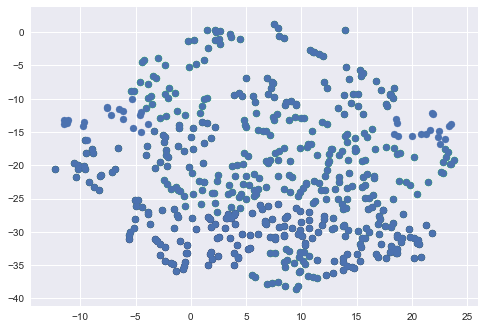

In [45]:
plt.scatter(df['0'],df['1'])

x = []
for i in df['0']:
    x.append(i)
y = []
for i in df['1']:
    y.append(i)
dict = {}
j = 0

for i in vocab:
    dict[j] = vocab
    j = j+1
print(len(dict))
plt.show()

22


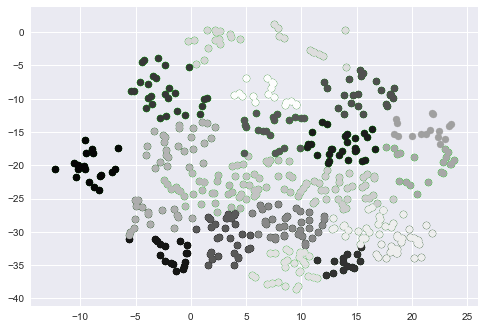

In [50]:
import numpy as np
print(max(idx))
rands = np.random.random_sample((10000,))
for k in range(0,max(idx)):
    cluster = [X_tsne[i] for i,val in enumerate(idx) if val == k]
    cluster = np.array(cluster)
    plt.scatter(cluster[:,0],cluster[:,1],color = (rands[k],rands[k],rands[k]))

plt.show()